#### Doing Binary Classification with CNN method using Tensorflow

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# defining the directory for the training dataset and validation dataset
base_dir = '/Users/anshirsa/OneDrive - Capgemini/Documents/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [2]:
import pathlib
data_dir = "/Users/anshirsa/OneDrive - Capgemini/Documents/cats_and_dogs_filtered/train"
data_dir = pathlib.Path(data_dir)

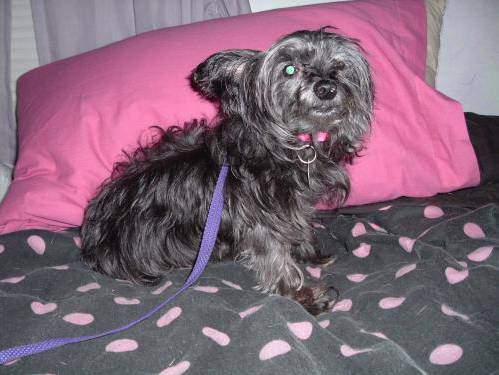

In [3]:
# Defining dogs images directory
import PIL
dogs = list(data_dir.glob('dogs/*'))
PIL.Image.open(str(dogs[0]))

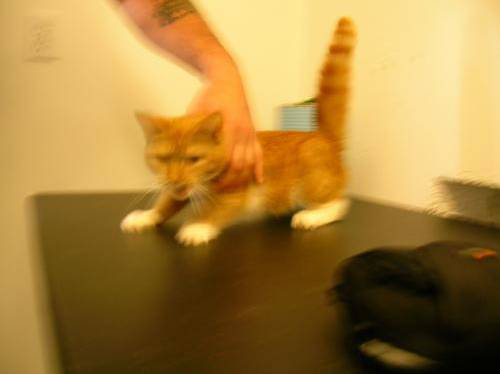

In [4]:
# Defining cats images directory
cats = list(data_dir.glob('cats/*'))
PIL.Image.open(str(cats[0]))

In [5]:
# cat and dog folders for training
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

In [6]:
# cat and dog folders for validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [7]:
# Doing Image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# we rescale all our images with the rescale parameter
train_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen  = ImageDataGenerator(rescale = 1.0/255)

# we use flow_from_directory to create a generator for training
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

# we use flow_from_directory to create a generator for validation
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode='binary',
                                                         target_size=(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # since Conv2D is the first layer of the neural network, we should also specify the size of the input
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    # apply pooling
    tf.keras.layers.MaxPooling2D(2,2),
    # and repeat the process
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the result to feed it to the dense layer
    tf.keras.layers.Flatten(), 
    # and define 512 neurons for processing the output coming by the previous layers
    tf.keras.layers.Dense(512, activation='relu'), 
    # a single output neuron. The result will be 0 if the image is a cat, 1 if it is a dog
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [9]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [10]:
# Training the model
history = model.fit(
            train_generator, # pass in the training generator
            steps_per_epoch=100,
            epochs=15,
            validation_data=validation_generator, # pass in the validation generator
            validation_steps=50,
            verbose=2
            )

Epoch 1/15
100/100 - 30s - loss: 0.7037 - accuracy: 0.5515 - val_loss: 0.6825 - val_accuracy: 0.5120 - 30s/epoch - 305ms/step
Epoch 2/15
100/100 - 32s - loss: 0.6256 - accuracy: 0.6435 - val_loss: 0.6921 - val_accuracy: 0.5940 - 32s/epoch - 315ms/step
Epoch 3/15
100/100 - 29s - loss: 0.5703 - accuracy: 0.6990 - val_loss: 0.5594 - val_accuracy: 0.7240 - 29s/epoch - 286ms/step
Epoch 4/15
100/100 - 29s - loss: 0.4692 - accuracy: 0.7765 - val_loss: 0.6425 - val_accuracy: 0.6750 - 29s/epoch - 288ms/step
Epoch 5/15
100/100 - 30s - loss: 0.4269 - accuracy: 0.8005 - val_loss: 0.6251 - val_accuracy: 0.6680 - 30s/epoch - 296ms/step
Epoch 6/15
100/100 - 31s - loss: 0.3536 - accuracy: 0.8355 - val_loss: 0.6068 - val_accuracy: 0.7160 - 31s/epoch - 307ms/step
Epoch 7/15
100/100 - 28s - loss: 0.2397 - accuracy: 0.8960 - val_loss: 0.6847 - val_accuracy: 0.7060 - 28s/epoch - 283ms/step
Epoch 8/15
100/100 - 29s - loss: 0.1590 - accuracy: 0.9425 - val_loss: 0.8684 - val_accuracy: 0.7320 - 29s/epoch - 289

Text(0.5, 1.0, 'Loss in training and validation')

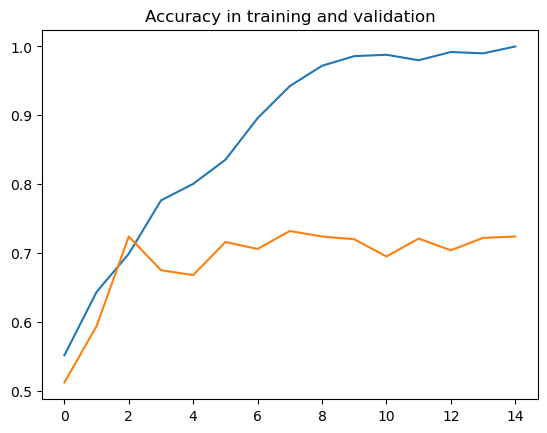

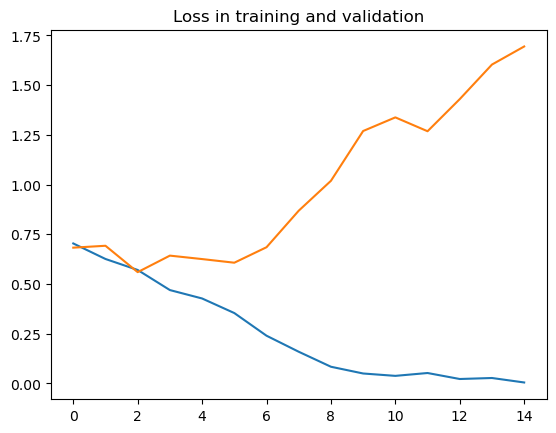

In [11]:
# Model Evaluation
import matplotlib.pyplot as plt
# get the metrics from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) 

# plot accuracy with matplotlib
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and validation')
plt.figure()

# plot loss with matplotlib
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and validation')

1/1 [==============================] - 0s 24ms/step
This is an image of a dog


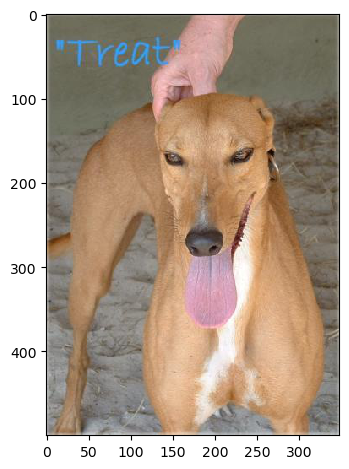

In [37]:
# Load and show an image in pillow
from PIL import Image
import os, os.path
from skimage import io

img_height = 150
img_width = 150


imgs = []
path = "/Users/anshirsa/OneDrive - Capgemini/Documents/IBM Machine Learning/PetImages/Dog/1001.jpg"
valid_images = [ ".jpg",".jpeg",".png"]

image = io.imread("/Users/anshirsa/OneDrive - Capgemini/Documents/IBM Machine Learning/PetImages/Dog/1001.jpg")

# Loading the image
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])

if score > 0.5:
    io.imshow(image)
    print("This is an image of a dog")
else:
    io.imshow(image)
    print("This is an image of a cat")

1/1 [==============================] - 0s 24ms/step
This is an image of a cat


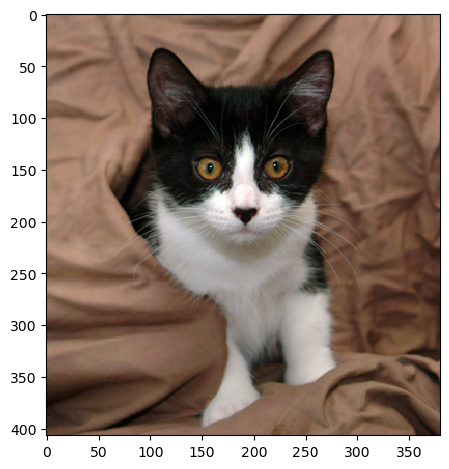

In [39]:
# Load and show an image in pillow
from PIL import Image
import os, os.path
from skimage import io

img_height = 150
img_width = 150


imgs = []
path = "/Users/anshirsa/OneDrive - Capgemini/Documents/IBM Machine Learning/PetImages/Cat/1002.jpg"
valid_images = [ ".jpg",".jpeg",".png"]

image = io.imread("/Users/anshirsa/OneDrive - Capgemini/Documents/IBM Machine Learning/PetImages/Cat/1002.jpg")

# Loading the image
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])

if score > 0.5:
    io.imshow(image)
    print("This is an image of a dog")
else:
    io.imshow(image)
    print("This is an image of a cat")

1/1 [==============================] - 0s 23ms/step
This is an image of a cat


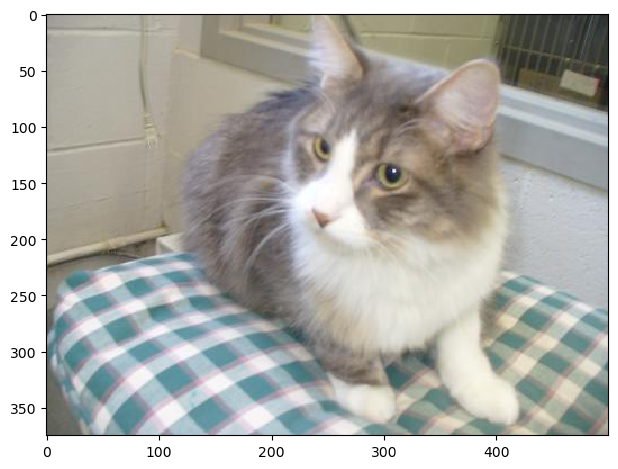

In [40]:
# Load and show an image in pillow
from PIL import Image
import os, os.path
from skimage import io

img_height = 150
img_width = 150


imgs = []
path = "/Users/anshirsa/OneDrive - Capgemini/Documents/IBM Machine Learning/PetImages/Cat/1029.jpg"
valid_images = [ ".jpg",".jpeg",".png"]

image = io.imread("/Users/anshirsa/OneDrive - Capgemini/Documents/IBM Machine Learning/PetImages/Cat/1029.jpg")

# Loading the image
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])

if score > 0.5:
    io.imshow(image)
    print("This is an image of a dog")
else:
    io.imshow(image)
    print("This is an image of a cat")

1/1 [==============================] - 0s 28ms/step
This is an image of a cat


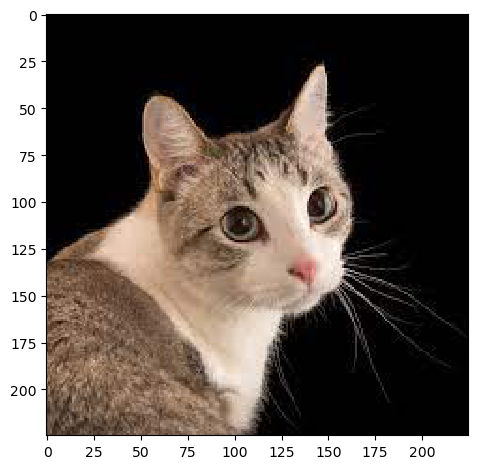

In [41]:
# Load and show an image in pillow
from PIL import Image
import os, os.path
from skimage import io

img_height = 150
img_width = 150


imgs = []
path = "/users/anshirsa/Downloads/cat_sample.jpg"
valid_images = [ ".jpg",".jpeg",".png"]

image = io.imread("/users/anshirsa/Downloads/cat_sample.jpg")

# Loading the image
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])

if score > 0.5:
    io.imshow(image)
    print("This is an image of a dog")
else:
    io.imshow(image)
    print("This is an image of a cat")

1/1 [==============================] - 0s 23ms/step
This is an image of a dog


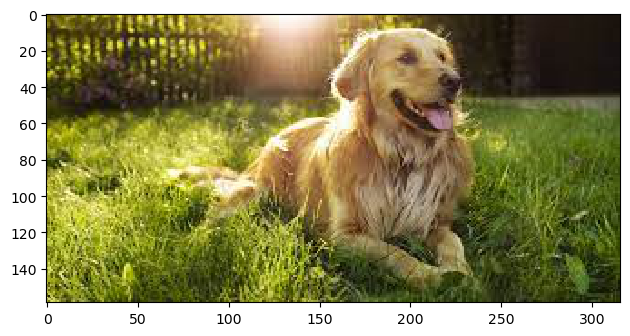

In [42]:
# Load and show an image in pillow
from PIL import Image
import os, os.path
from skimage import io

img_height = 150
img_width = 150


imgs = []
path = "/users/anshirsa/Downloads/dog_sample.jpg"
valid_images = [ ".jpg",".jpeg",".png"]

image = io.imread("/users/anshirsa/Downloads/dog_sample.jpg")

# Loading the image
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])

if score > 0.5:
    io.imshow(image)
    print("This is an image of a dog")
else:
    io.imshow(image)
    print("This is an image of a cat")